In [58]:
import pystan
import pickle
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import statsmodels.api as statmod
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
df = pd.read_excel("C:\\Users\\steve\\Google Drive\\Research\\data\\Succinct Version_V2.xlsx")
#df = df.iloc[:,0:27]
df.shape

(162, 18)

In [60]:
df['Migration ratio(ASEAN/World)'].interpolate(method='slinear', inplace=True, limit_direction="both")
df['Avg School Yr of Labor Force'].interpolate(method='slinear', inplace=True, limit_direction="both")
df['Logistic Performance Index'].interpolate(method='slinear', inplace=True, limit_direction="both")
df

Country  Country_Code  Year  Food_Share  intra-ASEAN export ratio  \
0       Cambodia             0  2001         NaN                       NaN   
1       Cambodia             0  2002         NaN                       NaN   
2       Cambodia             0  2003         NaN                       NaN   
3       Cambodia             0  2004         NaN                       NaN   
4       Cambodia             0  2005         NaN                       NaN   
5       Cambodia             0  2006         NaN                       NaN   
6       Cambodia             0  2007         NaN                       NaN   
7       Cambodia             0  2008         NaN                       NaN   
8       Cambodia             0  2009         NaN                       NaN   
9       Cambodia             0  2010         NaN                  0.128488   
10      Cambodia             0  2011         NaN                  0.122020   
11      Cambodia             0  2012         NaN                  0.146529   
12      Cambodia             0  2013   46.684951                  0.127326   
13      Cambodia             0  2014   44.007176                  0.113931   
14      Cambodia             0  2015   43.600295                  0.123130   
15      Cambodia             0  2016   42.790198                  0.154524   
16      Cambodia             0  2017   42.507479                  0.114615   
17      Cambodia             0  2018   42.332431                  0.089322   
18     Indonesia             1  2001         NaN                       NaN   
19     Indonesia             1  2002         NaN                       NaN   
20     Indonesia             1  2003         NaN                       NaN   
21     Indonesia             1  2004         NaN                       NaN   
22     Indonesia             1  2005         NaN                       NaN   
23     Indonesia             1  2006         NaN                       NaN   
24     Indonesia             1  2007         NaN                       NaN   
25     Indonesia             1  2008         NaN                       NaN   
26     Indonesia             1  2009   33.800000                  0.211322   
27     Indonesia             1  2010   33.400000                  0.211354   
28     Indonesia             1  2011   33.660000                  0.206876   
29     Indonesia             1  2012   32.642000                  0.220123   
30     Indonesia             1  2013   32.117332                  0.222562   
31     Indonesia             1  2014   31.437340                  0.225488   
32     Indonesia             1  2015   31.883520                  0.223293   
33     Indonesia             1  2016   31.629787                  0.229784   
34     Indonesia             1  2017   31.865202                  0.232936   
35     Indonesia             1  2018   31.747117                  0.233862   
36          Laos             2  2001         NaN                       NaN   
37          Laos             2  2002         NaN                       NaN   
38          Laos             2  2003         NaN                       NaN   
39          Laos             2  2004         NaN                       NaN   
40          Laos             2  2005         NaN                       NaN   
41          Laos             2  2006         NaN                       NaN   
42          Laos             2  2007         NaN                       NaN   
43          Laos             2  2008         NaN                       NaN   
44          Laos             2  2009         NaN                       NaN   
45          Laos             2  2010         NaN                  0.523572   
46          Laos             2  2011         NaN                  0.531844   
47          Laos             2  2012         NaN                  0.530934   
48          Laos             2  2013   50.105585                  0.532541   
49          Laos             2  2014   50.047406                  0.493783   
50          Laos             2 

In [61]:
df = df.dropna()
df

Country  Country_Code  Year  Food_Share  intra-ASEAN export ratio  \
12      Cambodia             0  2013   46.684951                  0.127326   
13      Cambodia             0  2014   44.007176                  0.113931   
14      Cambodia             0  2015   43.600295                  0.123130   
15      Cambodia             0  2016   42.790198                  0.154524   
16      Cambodia             0  2017   42.507479                  0.114615   
17      Cambodia             0  2018   42.332431                  0.089322   
27     Indonesia             1  2010   33.400000                  0.211354   
28     Indonesia             1  2011   33.660000                  0.206876   
29     Indonesia             1  2012   32.642000                  0.220123   
30     Indonesia             1  2013   32.117332                  0.222562   
31     Indonesia             1  2014   31.437340                  0.225488   
32     Indonesia             1  2015   31.883520                  0.223293   
33     Indonesia             1  2016   31.629787                  0.229784   
34     Indonesia             1  2017   31.865202                  0.232936   
35     Indonesia             1  2018   31.747117                  0.233862   
48          Laos             2  2013   50.105585                  0.532541   
49          Laos             2  2014   50.047406                  0.493783   
50          Laos             2  2015   50.006328                  0.507674   
51          Laos             2  2016   49.946369                  0.508637   
63      Malaysia             3  2010   20.100000                  0.254016   
64      Malaysia             3  2011   20.703000                  0.246965   
65      Malaysia             3  2012   20.271000                  0.267825   
66      Malaysia             3  2013   20.547570                  0.279973   
67      Malaysia             3  2014   20.567793                  0.278767   
68      Malaysia             3  2015   21.014249                  0.281145   
69      Malaysia             3  2016   21.521291                  0.293805   
70      Malaysia             3  2017   21.508360                  0.288737   
71      Malaysia             3  2018   21.526559                  0.285845   
84       Myanmar             4  2013   58.742066                  0.491495   
85       Myanmar             4  2014   57.952299                  0.414754   
86       Myanmar             4  2015   57.237023                  0.375128   
87       Myanmar             4  2016   56.587022                  0.300776   
88       Myanmar             4  2017   56.315925                  0.280424   
89       Myanmar             4  2018   56.107237                  0.251779   
99   Philippines             5  2010   41.500000                  0.224183   
100  Philippines             5  2011   42.807000                  0.179749   
101  Philippines             5  2012   42.657000                  0.188565   
102  Philippines             5  2013   42.566201                  0.156001   
103  Philippines             5  2014   42.237185                  0.149038   
104  Philippines             5  2015   42.124857                  0.145571   
105  Philippines             5  2016   42.150067                  0.149190   
106  Philippines             5  2017   42.140591                  0.147411   
107  Philippines             5  2018   41.973731                  0.159602   
117    Singapore             6  2010    7.500000                  0.282976   
118    Singapore             6  2011    6.754000                  0.301628   
119    Singapore             6  2012    7.156000                  0.301092   
120    Singapore             6  2013    7.222209                  0.303371   
121    Singapore             6  2014    7.111882                  0.301039   
122    Singapore             6  2015    7.006894                  0.286313   
123    Singapore             6  2016    6.883857                  0.272327   
124    Singapore             6 

In [62]:
df.iloc[:, 4:8]

intra-ASEAN export ratio  intra-ASEAN import ratio  \
12                   0.127326                  0.528275   
13                   0.113931                  0.510016   
14                   0.123130                  0.497781   
15                   0.154524                  0.481518   
16                   0.114615                  0.505080   
17                   0.089322                  0.537452   
27                   0.211354                  0.317994   
28                   0.206876                  0.323166   
29                   0.220123                  0.310916   
30                   0.222562                  0.317575   
31                   0.225488                  0.310159   
32                   0.223293                  0.299660   
33                   0.229784                  0.288561   
34                   0.232936                  0.274978   
35                   0.233862                  0.275243   
48                   0.532541                  0.636630   
49                   0.493783                  0.642351   
50                   0.507674                  0.730653   
51                   0.508637                  0.748356   
63                   0.254016                  0.271573   
64                   0.246965                  0.277521   
65                   0.267825                  0.279117   
66                   0.279973                  0.267214   
67                   0.278767                  0.257458   
68                   0.281145                  0.265759   
69                   0.293805                  0.245984   
70                   0.288737                  0.256774   
71                   0.285845                  0.255380   
84                   0.491495                  0.353289   
85                   0.414754                  0.437101   
86                   0.375128                  0.415375   
87                   0.300776                  0.376477   
88                   0.280424                  0.395732   
89                   0.251779                  0.448130   
99                   0.224183                  0.281064   
100                  0.179749                  0.236127   
101                  0.188565                  0.228818   
102                  0.156001                  0.217349   
103                  0.149038                  0.238593   
104                  0.145571                  0.242901   
105                  0.149190                  0.261817   
106                  0.147411                  0.261114   
107                  0.159602                  0.249146   
117                  0.282976                  0.232150   
118                  0.301628                  0.210588   
119                  0.301092                  0.204815   
120                  0.303371                  0.202511   
121                  0.301039                  0.200555   
122                  0.286313                  0.203866   
123                  0.272327                  0.208899   
124                  0.272963                  0.205206   
125                  0.276190                  0.201764   
135                  0.226985                  0.178775   
136                  0.237313                  0.171672   
137                  0.247141                  0.172162   
138                  0.259547                  0.175503   
139                  0.261109                  0.189940   
140                  0.257191                  0.202589   
141                  0.253254                  0.203473   
142                  0.253086                  0.188720   
143                  0.271019                  0.195925   
153                  0.143487                  0.193395   
154                  0.140925                  0.195878   
155                  0.152161                  0.182987   
156                  0.140760                  0.161227   
157                  0.127200                  0.155025   
158                  0.112309                  0.143

In [63]:
hierarchical_model = """
data {
  int<lower=0> I;           # number of covariate in lower level model
  int<lower=0> J;           # number of covariate in upper level model  
  int<lower=0> N;           # number of observation
  int<lower=0> K;           # number of country
  int<lower=1,upper=K> country[N];
  matrix[K, J] z;           # upper level model的Z的觀察值
  matrix[N, I] x;           # lower level model的X的觀察值
  vector[N] y;              # response variable的觀察值
} 
parameters {
  matrix[J, I] Gamma;       # upper level model的斜率
  matrix[K, I] Delta;       # upper level model的截距
  corr_matrix[I] Omega;     # upper level model correlation matrix (可加可不加，不加的時候transformed那裡的quad_form_diag那項要拿掉，留下Delta[k,]就好)
  vector<lower = 0>[I] tau; # upper level model scale parameters (可加可不加，不加的時候transformed那裡的quad_form_diag那項要拿掉，留下Delta[k,]就好)
  real<lower = 0> lambda;   # Variance of the lower level model
  real<lower=0> sigma; // scale of log discrimination
} 
transformed parameters {
  matrix[K, I] Beta;        # lower level model的斜率
  for (k in 1:K) {    
    Beta[k,] = z[k,] * Gamma + Delta[k,] * quad_form_diag(Omega,tau);
  }
}
model {
  // Hyperpriors
  for (j in 1:J) {
    Gamma[j,] ~ normal(0, 5);
  }
  Omega ~ lkj_corr(2);
  tau ~ normal(0, 5);       ####### 可以用cauchy(0,2.5) or cauchy(0,5)，但從圖裡面看到的樣本分布又沒有那麼符合cauchy反而有點像normal
  sigma ~ cauchy(0,5);


  // Prior
  lambda ~ lognormal(0,sigma); 


  // Non-centered population model and likelihood.
  for (k in 1:K) {
    Delta[k,] ~ normal(0, 1); # 用standard normal distribution
  }

  for (n in 1:N) {
    y[n] ~ gamma(x[n,] * Beta[country[n],]', lambda);
  }
}
"""

In [64]:
np.array([list(df[df['Country_Code']==country_code].iloc[:,14:].mean()) for country_code in range(0,9)])

array([[ 0.14836211,  5.44533333,  2.70551208, 25.74708679],
       [ 0.34750147,  8.98888889,  2.98754694, 28.58098097],
       [ 0.14552449,  6.44966667,  2.28252225, 16.78465956],
       [ 0.65620357, 11.53222222,  3.44603806, 55.76374611],
       [ 0.12874262,  6.47866667,  2.3412785 , 17.86179785],
       [ 0.36157459,  9.40111111,  2.98203544, 31.95800597],
       [ 0.71693728, 12.77111111,  4.07523244, 71.18631111],
       [ 0.69604198, 10.20333333,  3.3085175 , 38.62509069],
       [ 0.39269212,  8.03444444,  3.06995717, 37.03209278]])

In [83]:
hierarchical_data = {'N': df.shape[0],
                     'I': 4,
                     'J': 4,
                     'K': len(df.Country.unique()),
                     'country': df.Country_Code.values +1, # Stan counts starting at 1
                     'x': np.array(df.iloc[:, 4:8]),
                     'z': np.array([list(df[df['Country_Code']==country_code].iloc[:,14:].mean()) for country_code in range(0,9)]), #將各個國家upper level在各個指標上的data各自平均，成為一個9x4的矩陣
                     'y': df.Food_Share.values}

hierarchcial_model_fit = pystan.stan(model_code=hierarchical_model, data=hierarchical_data, iter=3000, chains=4, control=dict(adapt_delta=0.99,max_treedepth=12))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aa50f81fdeb6d1915c5dffa243e70f4b NOW.


C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\pairplot.py:216: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  UserWarning,
C:\ProgramData\Anaconda3\lib\site-packages\arviz\numeric_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)
C:\ProgramData\Anaconda3\lib\site-packages\arviz\numeric_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)
C:\ProgramData\Anaconda3\lib\site-packages\arviz\numeric_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)
C:\ProgramData\Anaconda3\lib\site-packages\arviz\numeric_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)
C:\ProgramData\Anaconda3\lib\site-packages\arviz\numeric_utils.py:127: RuntimeWarning: invalid value encountered in sqrt
  std_de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020893BE9978>,
      dtype=object)

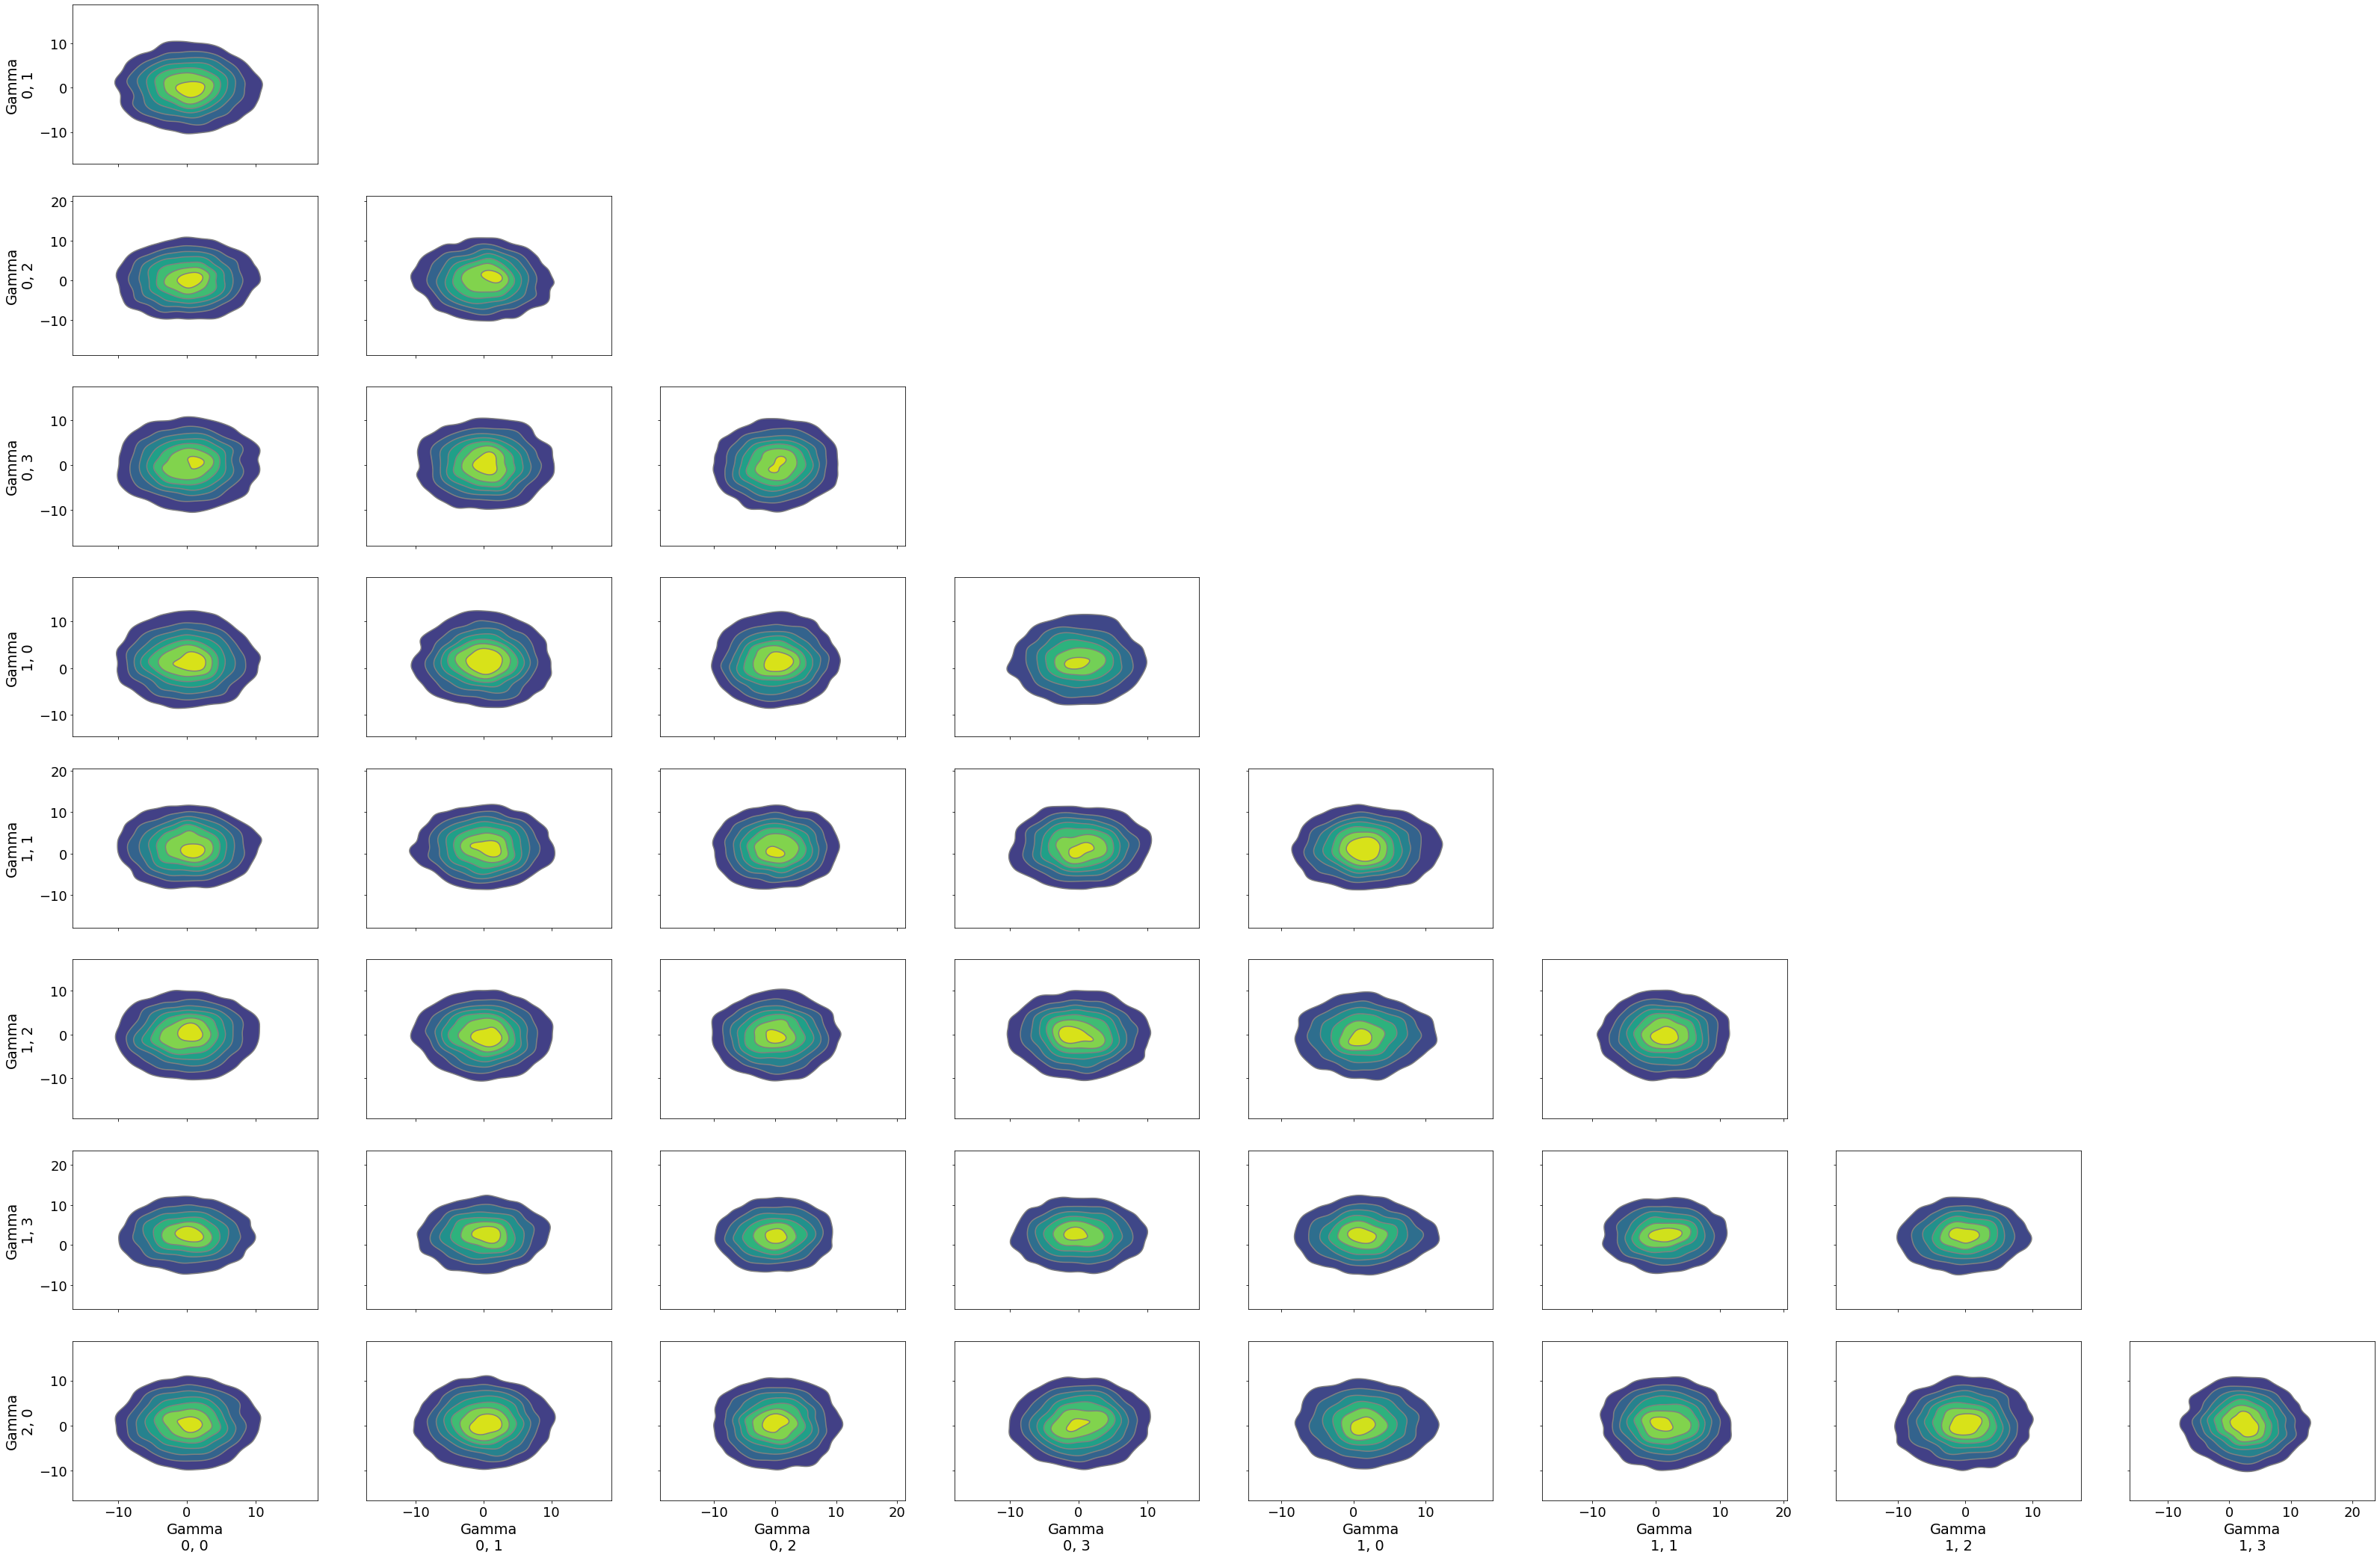

In [84]:
az.plot_pair(hierarchcial_model_fit,
            var_names=["Gamma", "Beta"],
            kind='kde',
            divergences=True,
            textsize=18)

### Results & Evaluation
1. Results

In [85]:
print(hierarchcial_model_fit)

Inference for Stan model: anon_model_aa50f81fdeb6d1915c5dffa243e70f4b.
4 chains, each with iter=3000; warmup=1500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=6000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
Gamma[1,1]  -0.02    0.04    5.0  -9.58  -3.43   0.03   3.33   9.79  12761    1.0
Gamma[2,1]    1.5    0.06   4.92  -7.97  -1.75   1.43   4.68  11.49   7748    1.0
Gamma[3,1]   0.46    0.05   4.95  -9.15  -2.88   0.43   3.83  10.15  11705    1.0
Gamma[4,1]   0.68    0.03   2.19  -3.46  -0.83   0.63   2.13   5.14   4366    1.0
Gamma[1,2]  -0.02    0.05   5.02  -10.0  -3.35   0.05   3.23   9.83  11446    1.0
Gamma[2,2]   1.38    0.05   4.91   -8.1  -1.97   1.37   4.78   10.9   9625    1.0
Gamma[3,2]   0.51    0.05   5.01  -9.28  -2.88   0.54   3.93  10.16  10422    1.0
Gamma[4,2]    1.9    0.05   3.22   -4.6  -0.29   1.92   4.08   8.19   4453    1.0
Gamma[1,3]   0.06    0.05    5.0  -9.44  -3.42   0.03   3.46   9.92  1132

2. Evaluation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208940A7AC8>,
      dtype=object)

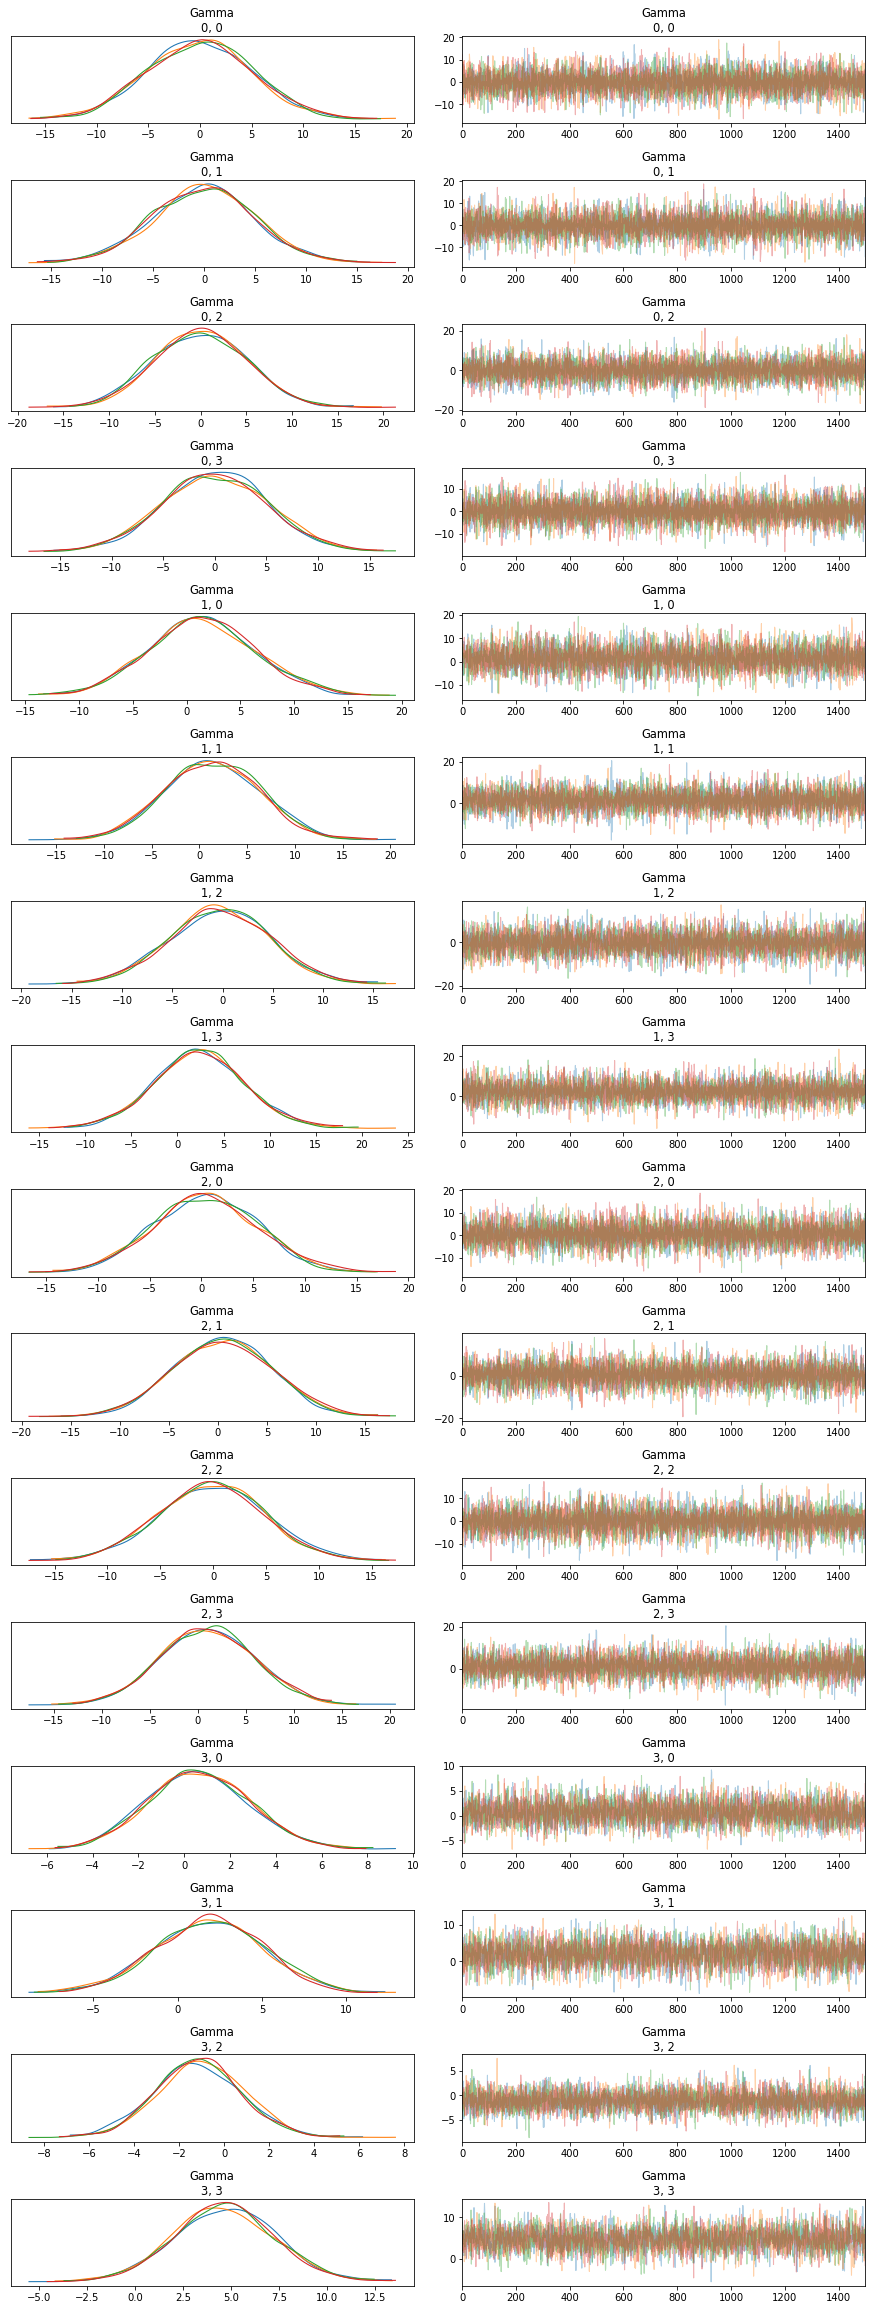

In [86]:
az.plot_trace(hierarchcial_model_fit,var_names=["Gamma"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208966711D0>,
      dtype=object)

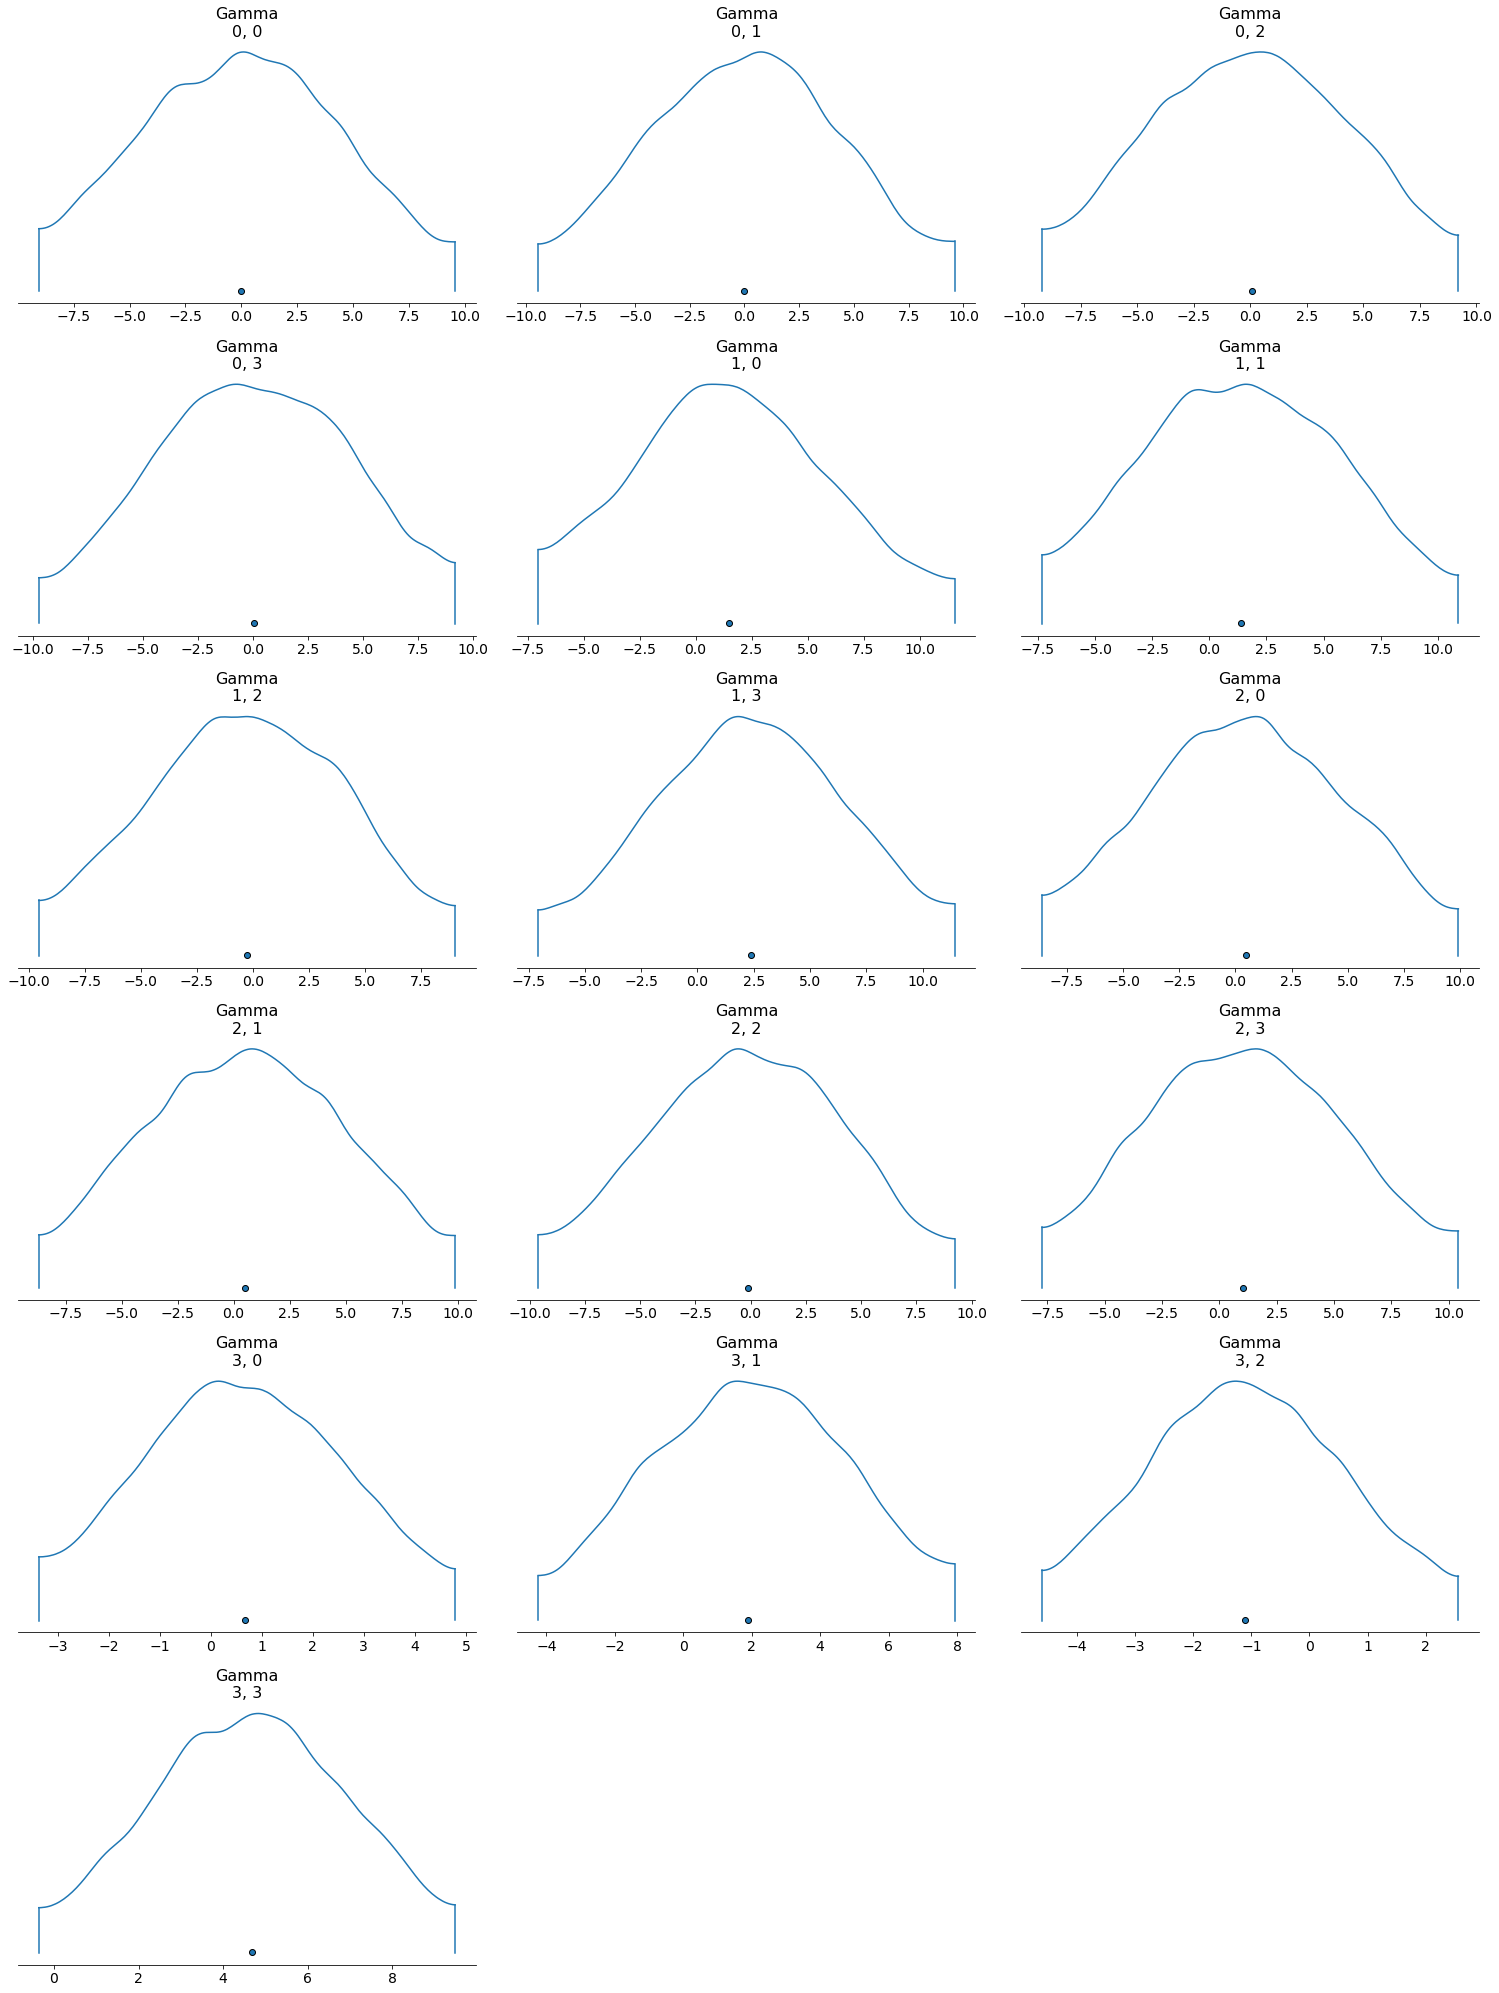

In [87]:
az_data = az.from_pystan(posterior = hierarchcial_model_fit)
az.plot_density(az_data,var_names=["Gamma"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020892D17A90>],
      dtype=object)

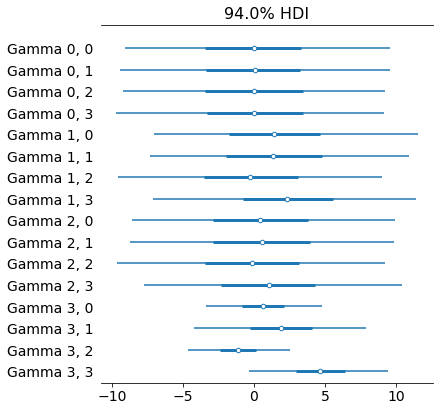

In [88]:
az.plot_forest(az_data, kind='forestplot',var_names=['Gamma'], combined = True)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\plots\traceplot.py:254: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (36), generating only 20 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002089031EF60>,
      dtype=object)

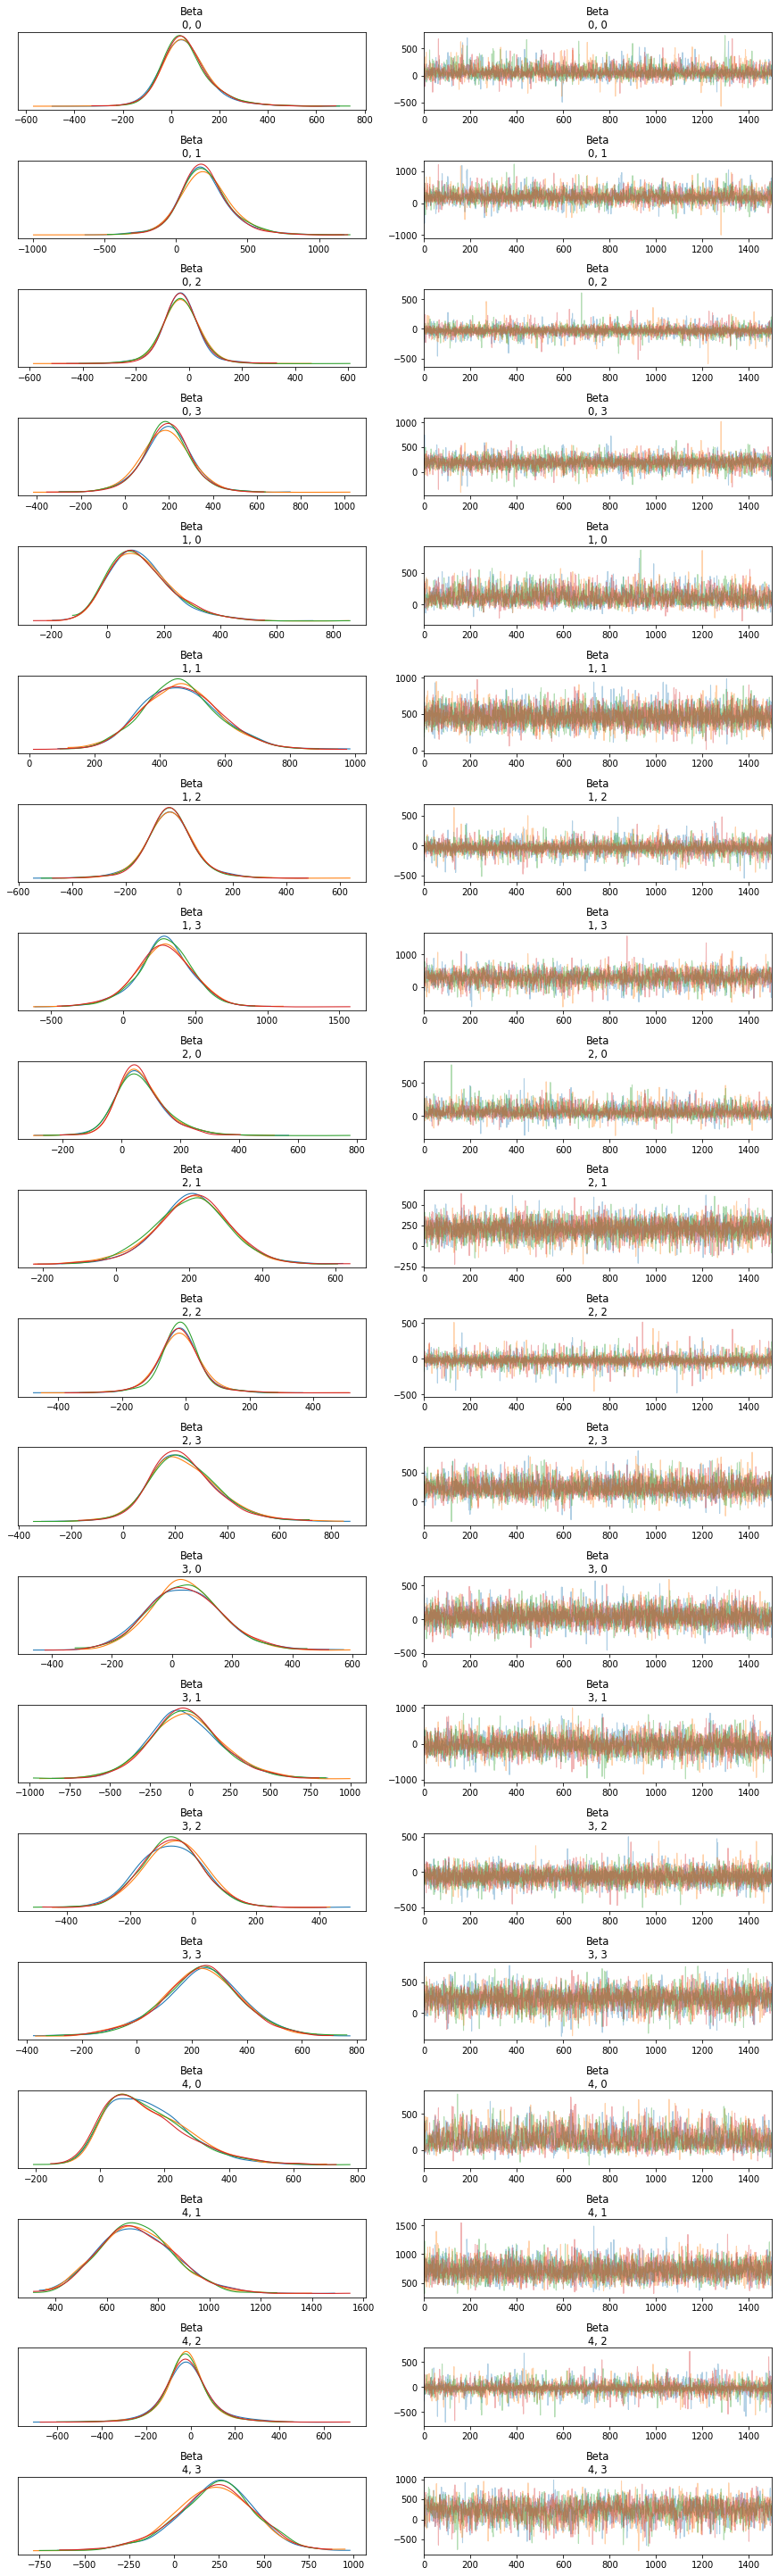

In [89]:
az.plot_trace(hierarchcial_model_fit,var_names=["Beta"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020893708C50>,
      dtype=object)

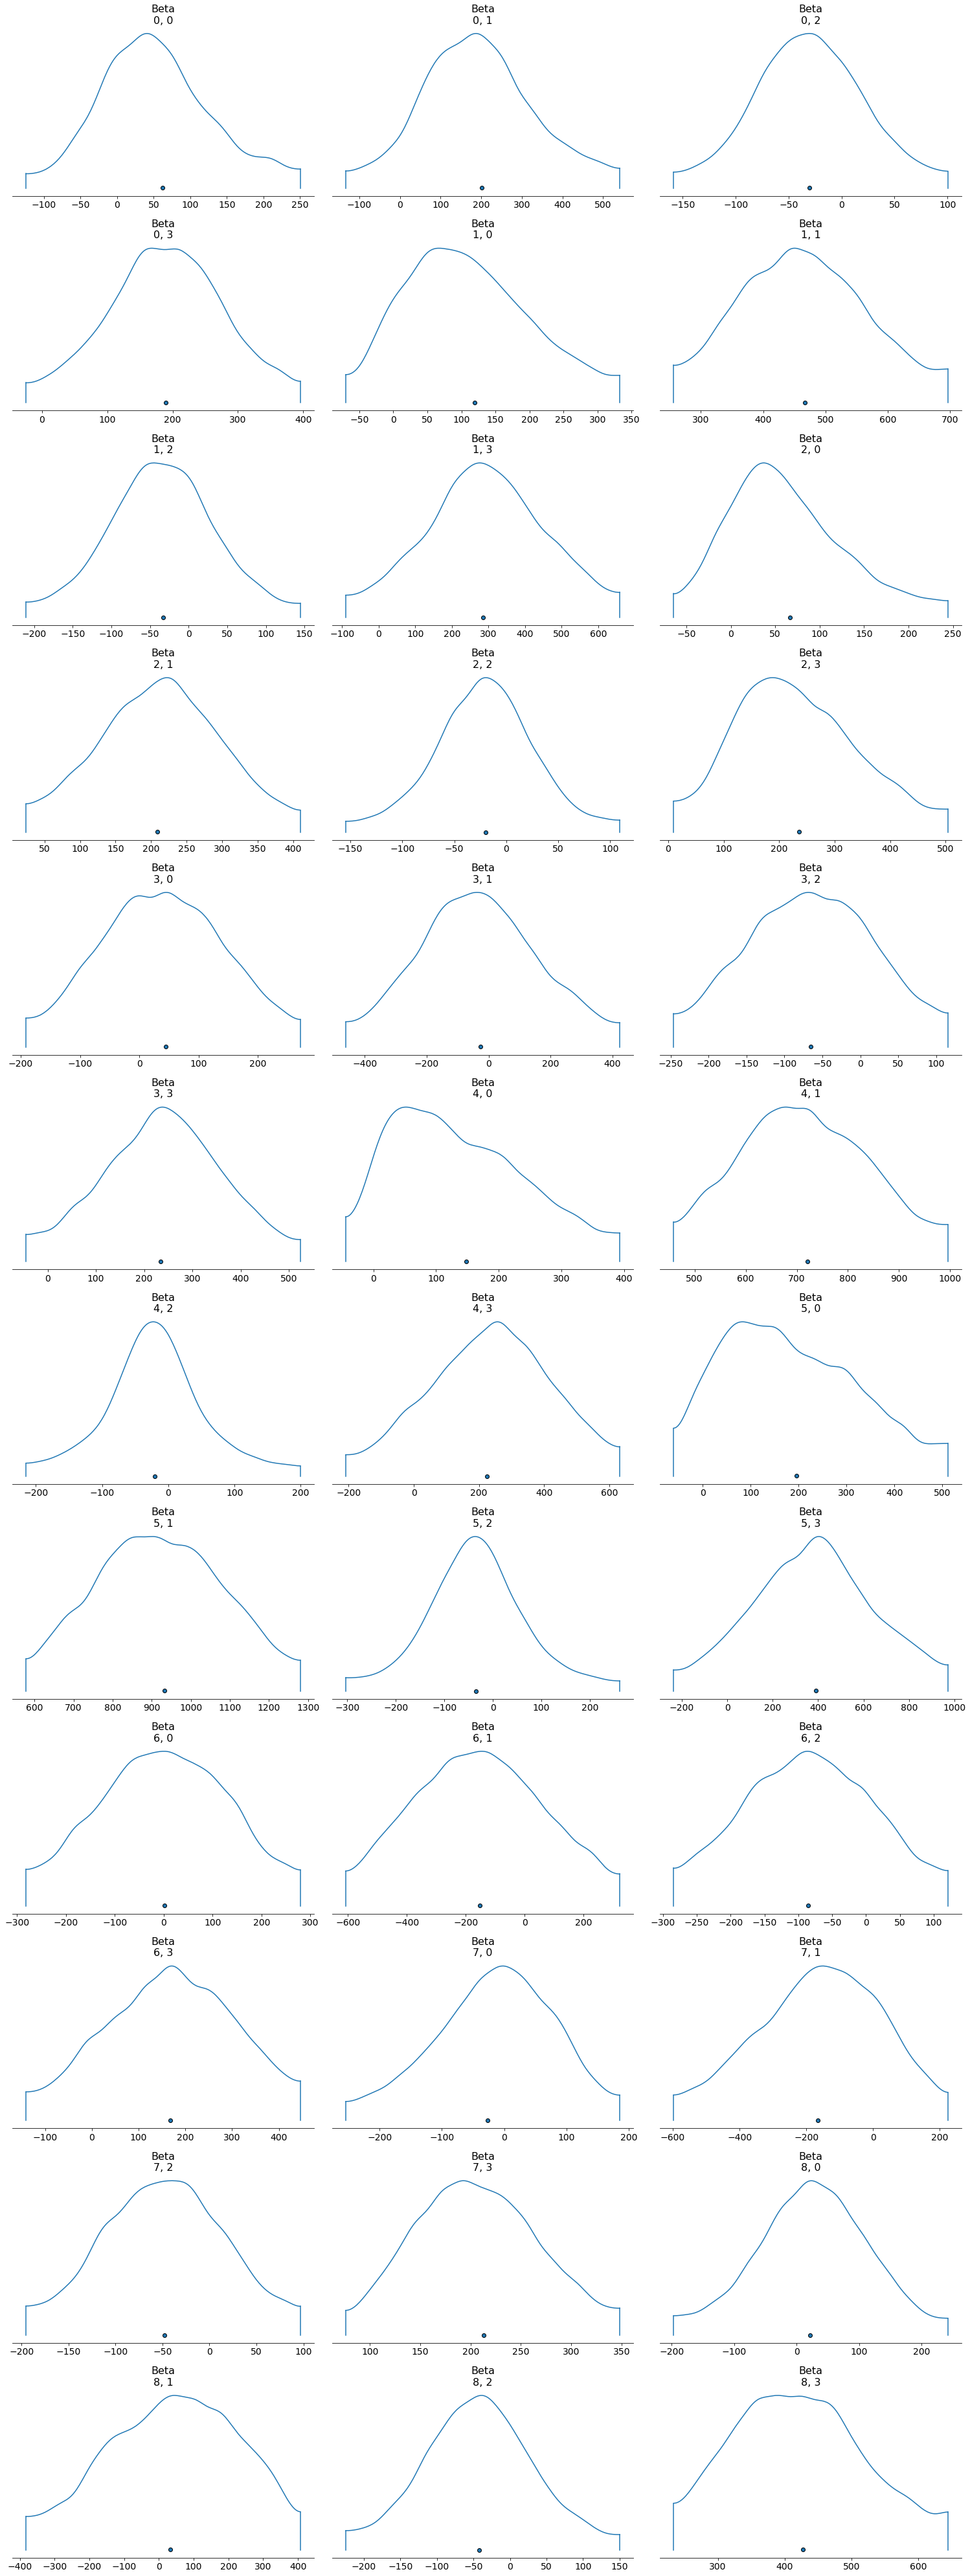

In [90]:
az_data = az.from_pystan(posterior = hierarchcial_model_fit)
az.plot_density(az_data,var_names=["Beta"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020898CE97B8>],
      dtype=object)

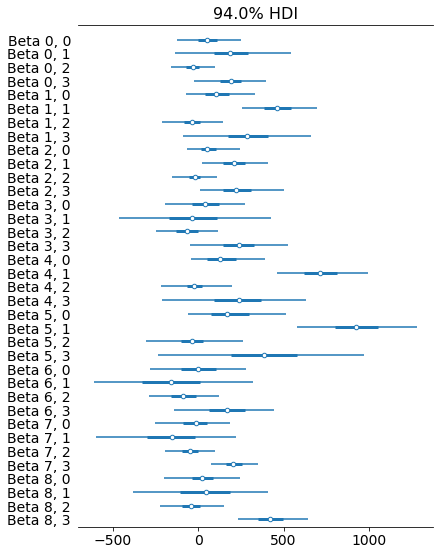

In [91]:
az.plot_forest(az_data, kind='forestplot',var_names=['Beta'], combined = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020898C3ECC0>,
      dtype=object)

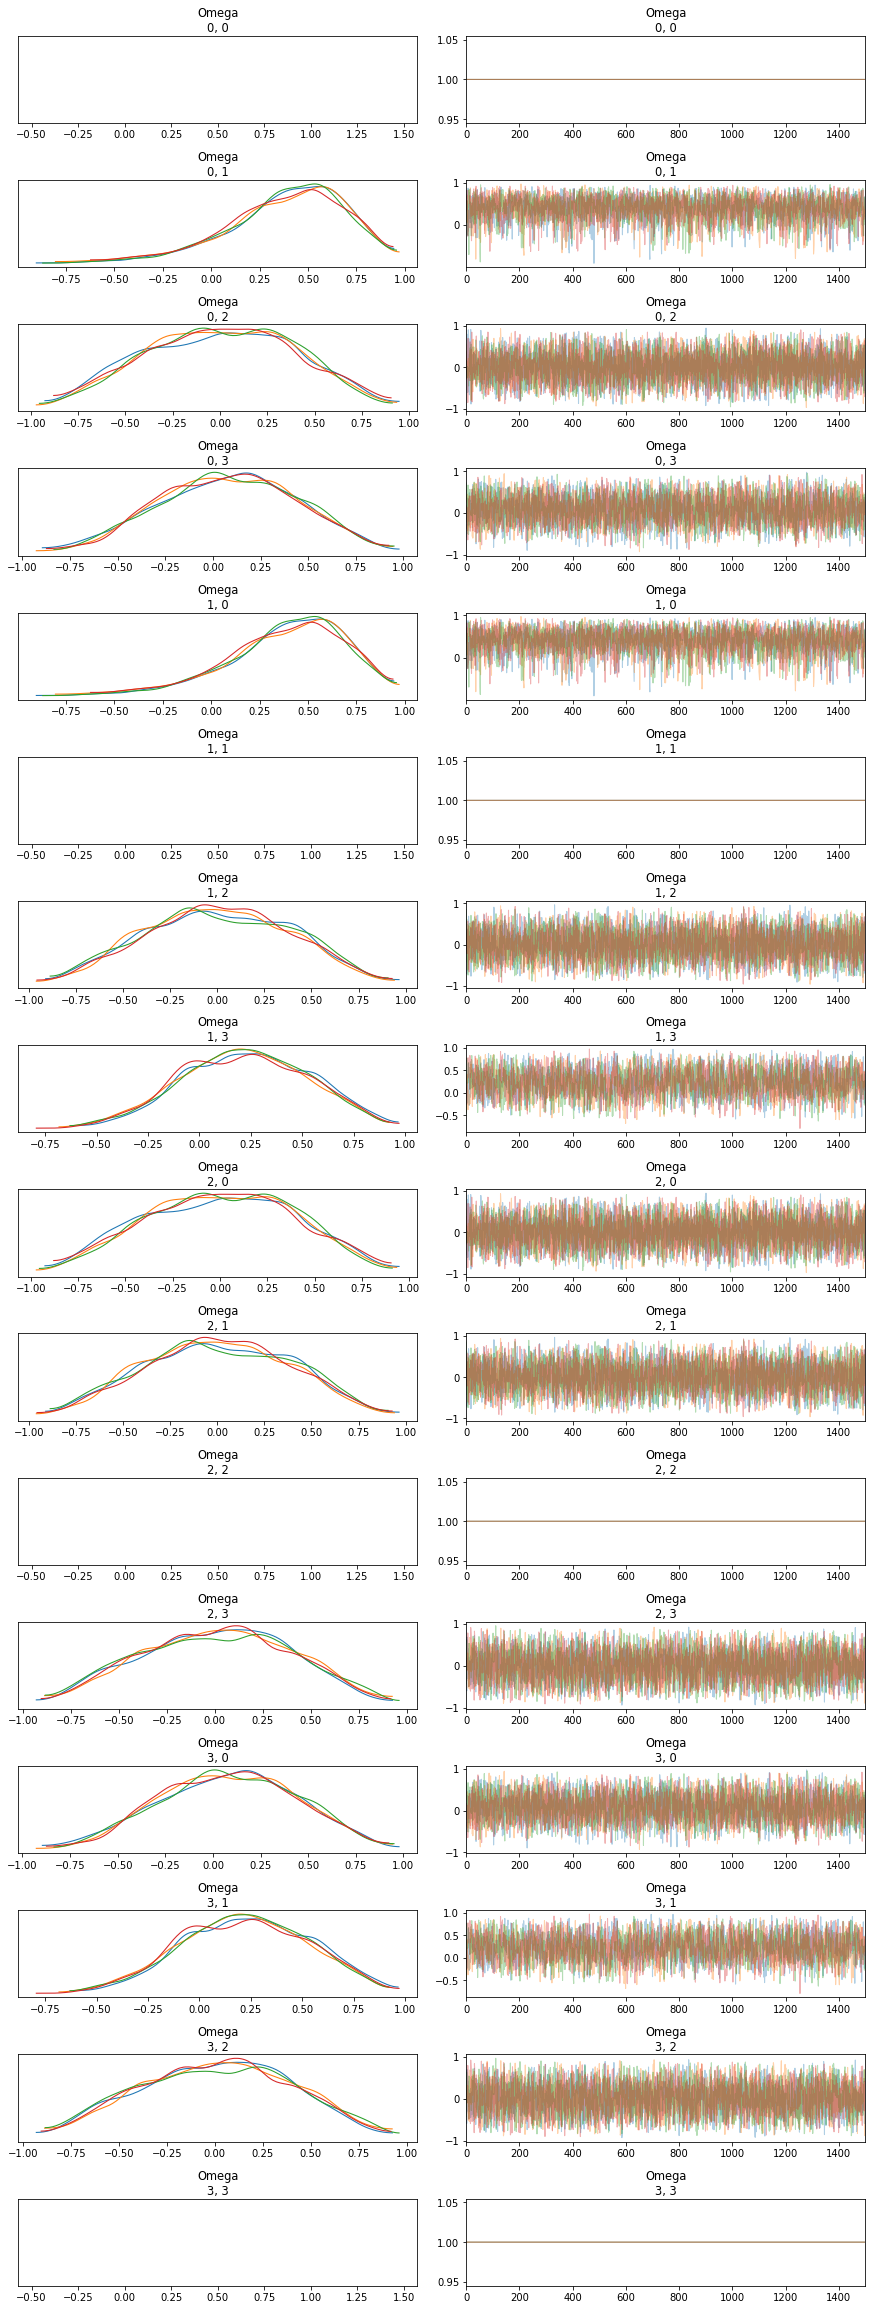

In [92]:
az.plot_trace(hierarchcial_model_fit,var_names=["Omega"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208A32DE470>,
      dtype=object)

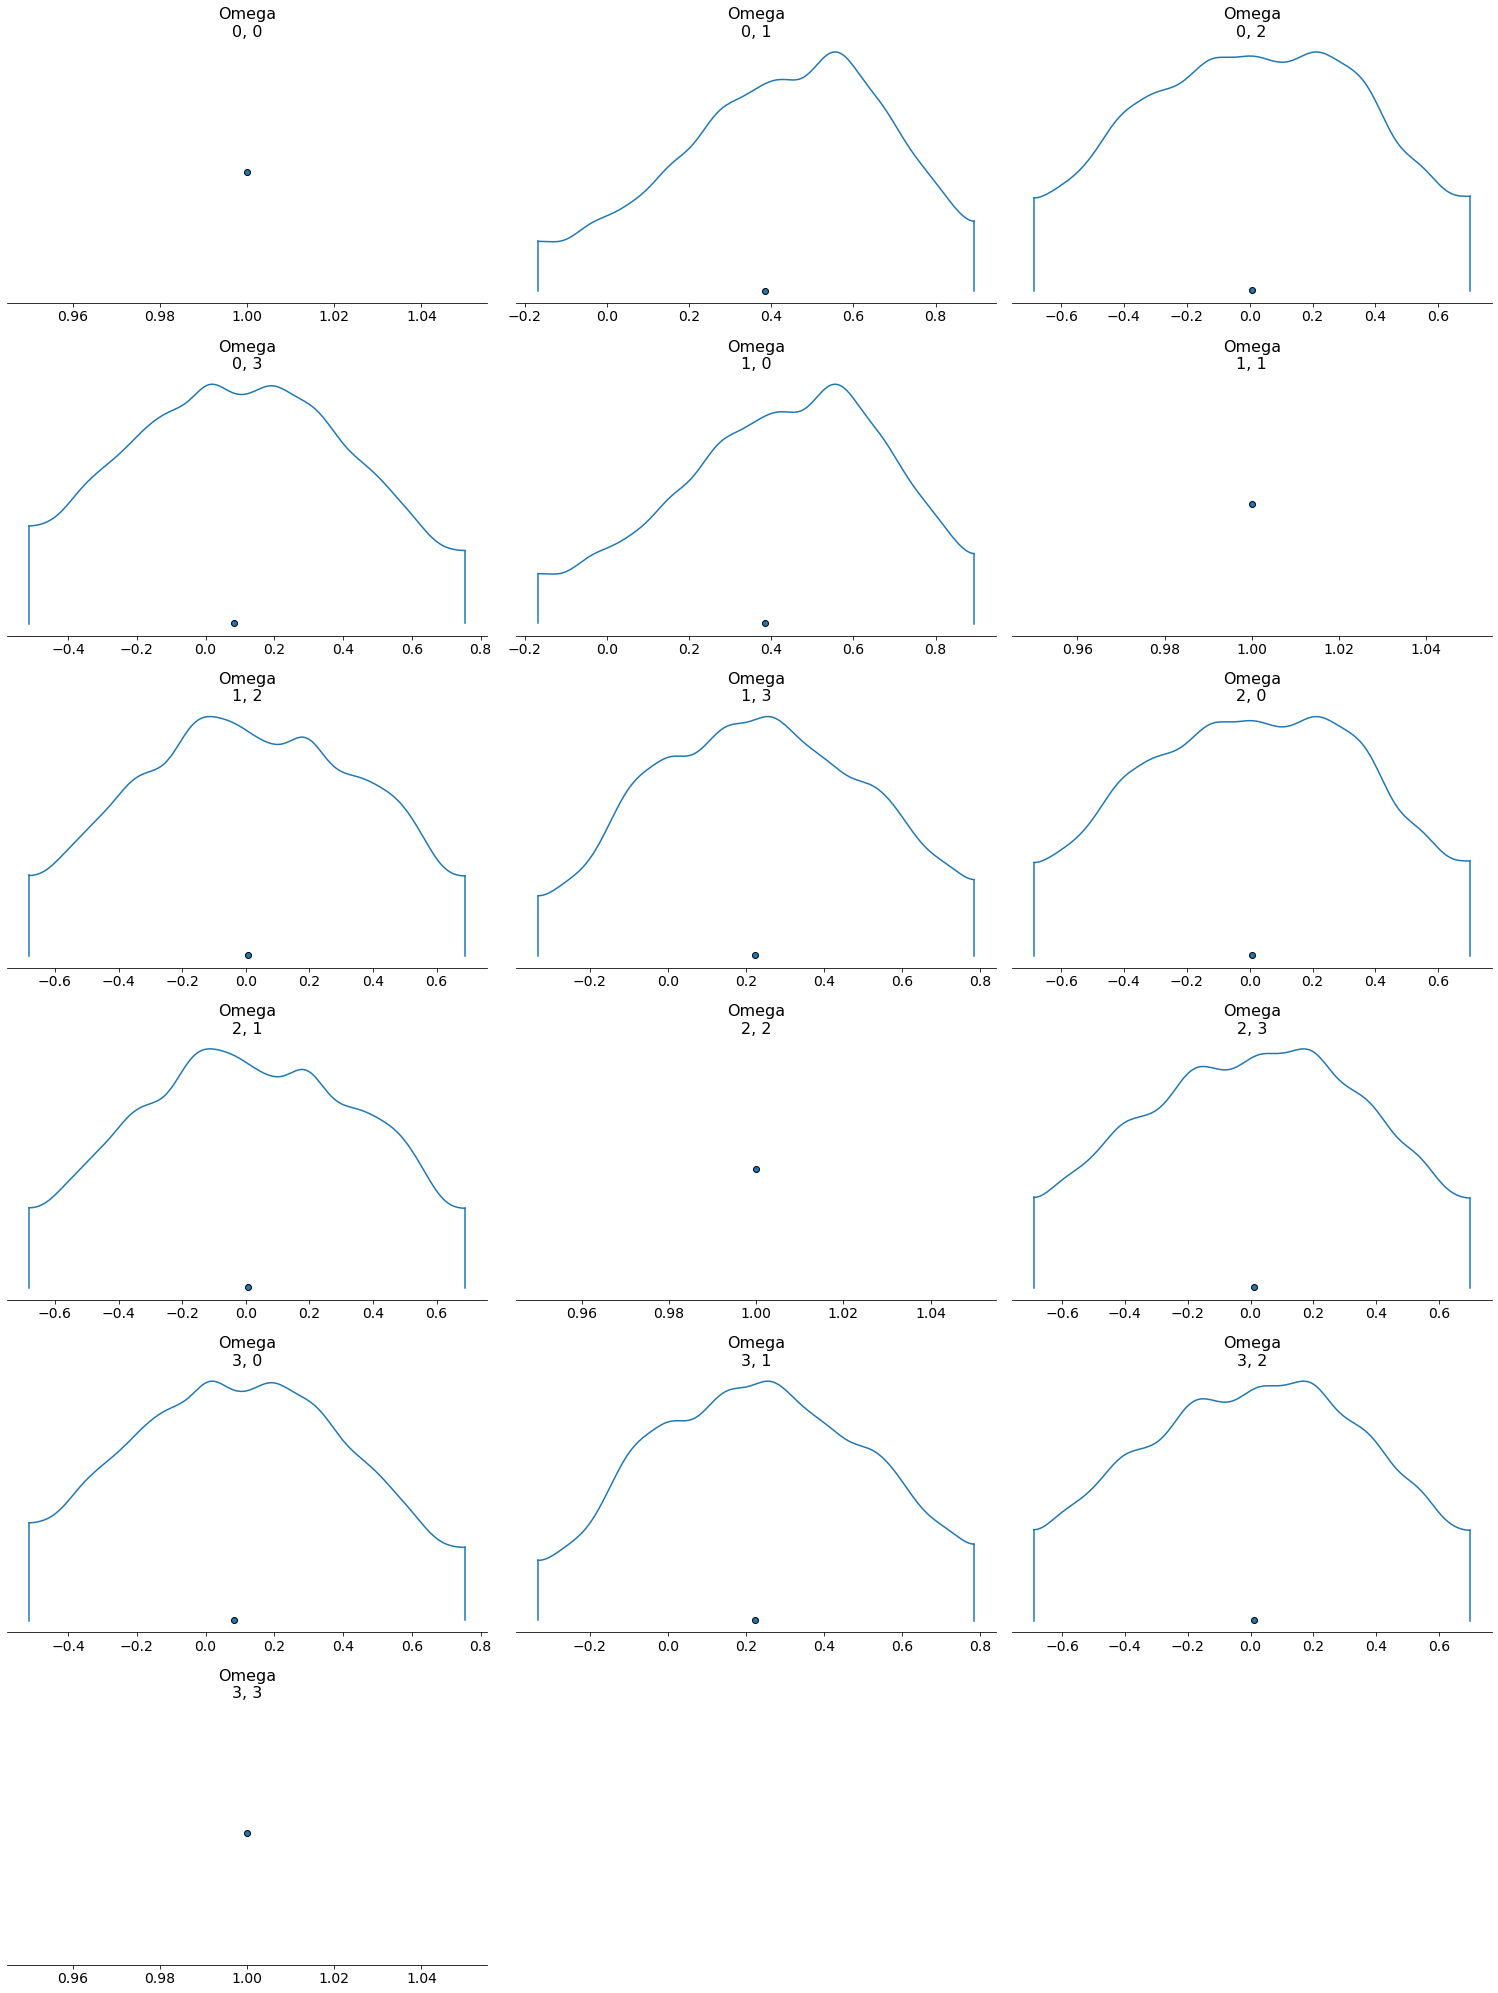

In [93]:
az_data = az.from_pystan(posterior = hierarchcial_model_fit)
az.plot_density(az_data,var_names=["Omega"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208A32C0588>],
      dtype=object)

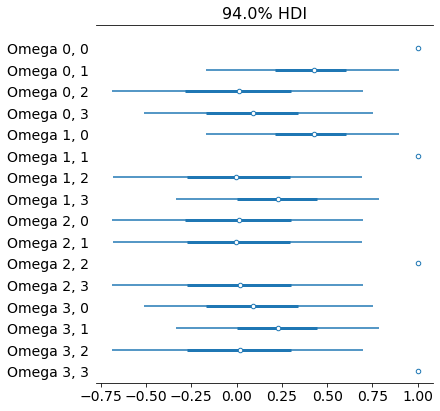

In [94]:
az.plot_forest(az_data, kind='forestplot',var_names=['Omega'], combined = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208A4E3EDD8>,
      dtype=object)

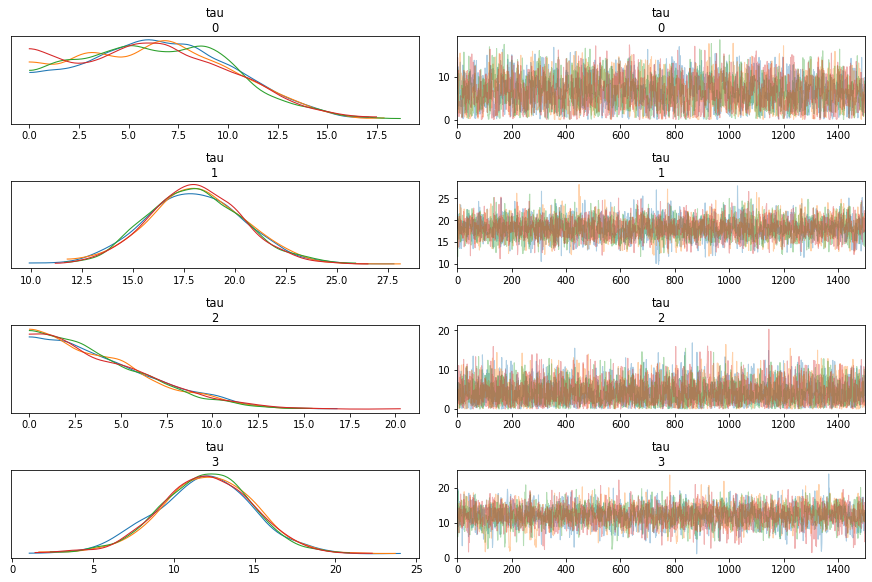

In [95]:
az.plot_trace(hierarchcial_model_fit,var_names=["tau"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208EB146438>,
      dtype=object)

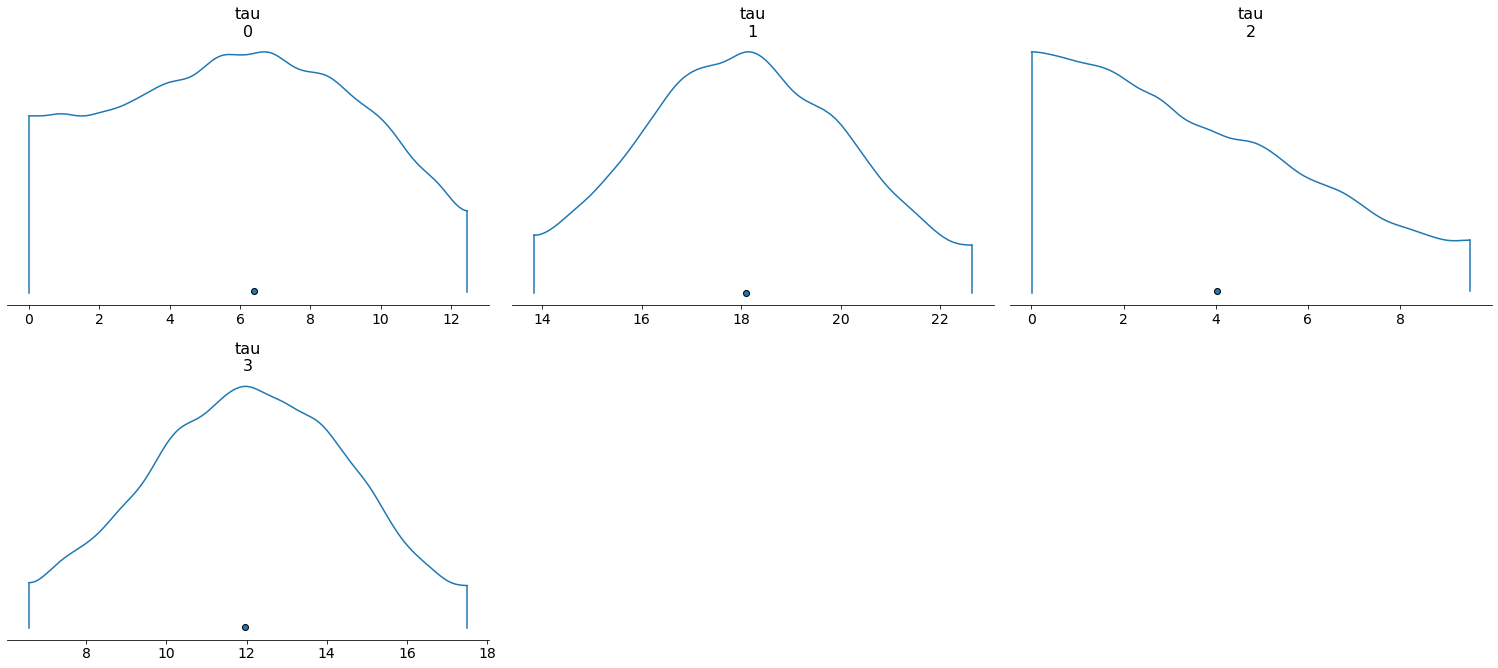

In [96]:
az_data = az.from_pystan(posterior = hierarchcial_model_fit)
az.plot_density(az_data,var_names=["tau"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FA3DBE48>],
      dtype=object)

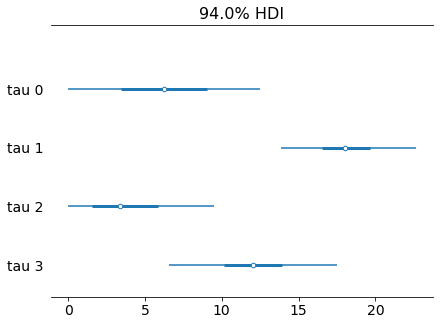

In [97]:
az.plot_forest(az_data, kind='forestplot',var_names=['tau'], combined = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FCBF9828>,
      dtype=object)

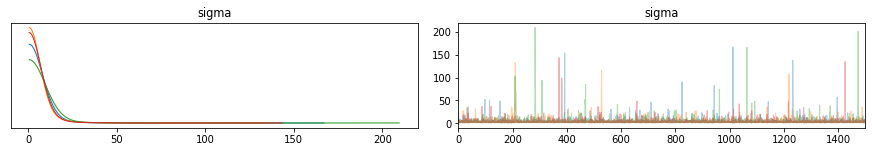

In [98]:
az.plot_trace(hierarchcial_model_fit,var_names=["sigma"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FCD12518>],
      dtype=object)

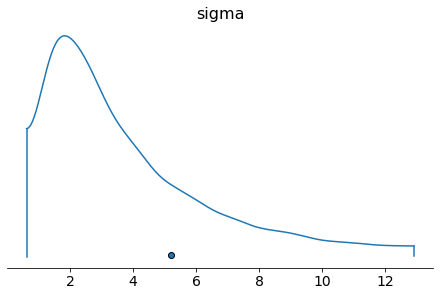

In [99]:
az_data = az.from_pystan(posterior = hierarchcial_model_fit)
az.plot_density(az_data,var_names=["sigma"])

INFO:numba.transforms:finding looplift candidates


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000208FCD86B70>],
      dtype=object)

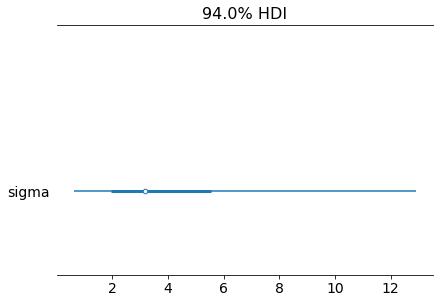

In [100]:
az.plot_forest(az_data, kind='forestplot',var_names=['sigma'], combined = True)

## Diagnostic